In [3]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats 

# 1. Reading and preparing the data.

In [4]:
cell_count = pd.read_csv("cell-count.csv")

In [5]:
# Filtering DF
cell_count = cell_count[(cell_count['treatment'] == 'tr1') & (cell_count['sample_type'] == 'PBMC')]

In [6]:
# time_from_treatment_start should be the same for a valid comparison.
cell_count = cell_count[cell_count['time_from_treatment_start']==0]

In [7]:
# The total counts column
cell_count['total'] = cell_count['b_cell'] + cell_count['cd8_t_cell'] + cell_count['cd4_t_cell'] + cell_count['nk_cell'] + cell_count['monocyte']

In [8]:
cell_count = cell_count.melt(id_vars= list(cell_count.columns[:10]) + [cell_count.columns[15]], var_name='population', value_name='count')

In [9]:
# The relative frequency
cell_count ['rel_frequency'] = 100 * cell_count['count'] / cell_count['total']

In [10]:
cell_count.head()

,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatment_start,total,population,count,rel_frequency
0,prj1,sbj1,melanoma,70,F,tr1,y,s1,PBMC,0.0,120000,b_cell,36000,30.0
1,prj1,sbj3,melanoma,75,M,tr1,n,s5,PBMC,0.0,150000,b_cell,60000,40.0
2,prj2,sbj8,melanoma,30,F,tr1,y,s12,PBMC,0.0,120000,b_cell,39600,33.0
3,prj2,sbj9,melanoma,72,M,tr1,y,s13,PBMC,0.0,115000,b_cell,31050,27.0
4,prj2,sbj10,lung,63,M,tr1,n,s14,PBMC,0.0,100000,b_cell,31000,31.0


# 2. Visualization and Statistical Analysis

In [53]:
# Fucntion to compute p-values

def compute_p_values(population_type: str):

    # The rel_frequency for the two groups
    yes_grp = cell_count[(cell_count['population']==population_type) & (cell_count['response']=='y')]['rel_frequency']
    no_grp = cell_count[(cell_count['population']==population_type) & (cell_count['response']=='n')]['rel_frequency']

    # Measurements are normally distributed and the variance is not constant between the groups.
    # Therefore, I have chosen the Welch's test
    print(stats.ttest_ind(yes_grp, no_grp, equal_var = False)) 

    
    

## a) B Cell 

<Axes: xlabel='population', ylabel='rel_frequency'>

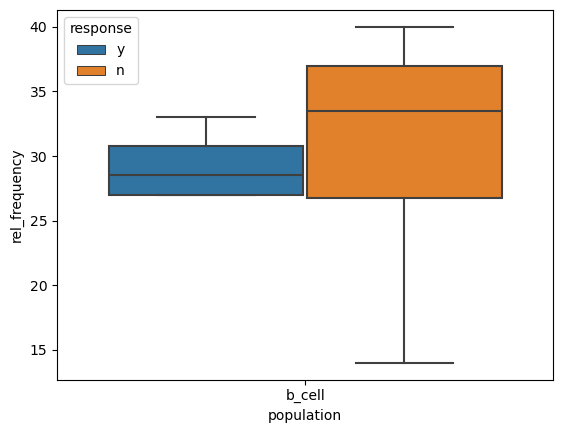

In [51]:
sns.boxplot(x='population', y='rel_frequency', hue='response', data=cell_count[cell_count['population']=='b_cell'])

In [54]:
compute_p_values('b_cell')

TtestResult(statistic=-0.16953617599220494, pvalue=0.8750332341258431, df=3.3766075480196074)


## b) CD4 T Cell

<Axes: xlabel='population', ylabel='rel_frequency'>

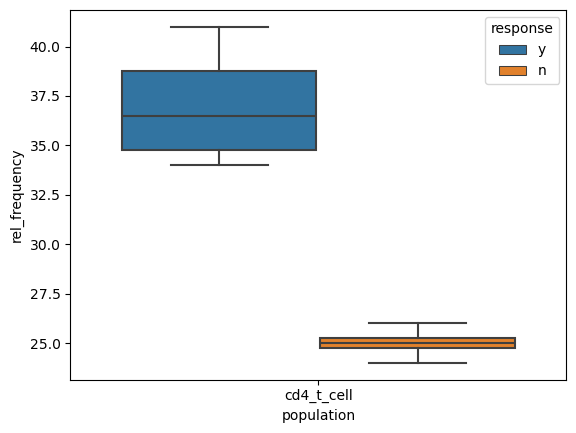

In [71]:
sns.boxplot(x='population', y='rel_frequency', hue='response', data=cell_count[cell_count['population']=='cd4_t_cell'])

In [55]:
compute_p_values('cd4_t_cell')

TtestResult(statistic=7.3484692283495345, pvalue=0.0033663610804733394, df=3.398230088495575)


## c) CD8 T Cell

<Axes: xlabel='population', ylabel='rel_frequency'>

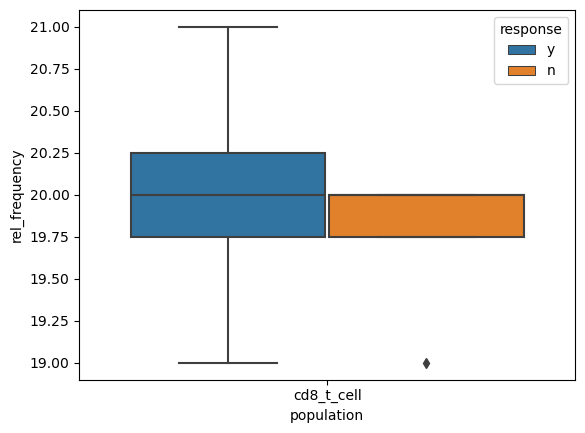

In [72]:
sns.boxplot(x='population', y='rel_frequency', hue='response', data=cell_count[cell_count['population']=='cd8_t_cell'])

In [56]:
compute_p_values('cd8_t_cell')

TtestResult(statistic=0.5222329678670935, pvalue=0.6239289144043596, df=4.972602739726026)


## d) NK Cell

<Axes: xlabel='population', ylabel='rel_frequency'>

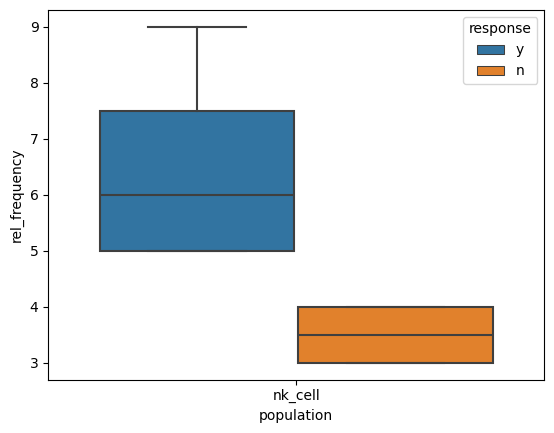

In [69]:
sns.boxplot(x='population', y='rel_frequency', hue='response', data=cell_count[cell_count['population']=='nk_cell'])

In [57]:
compute_p_values('nk_cell')

TtestResult(statistic=3.0, pvalue=0.04667533758736983, df=3.5409836065573774)


## e) Monocyte

<Axes: xlabel='population', ylabel='rel_frequency'>

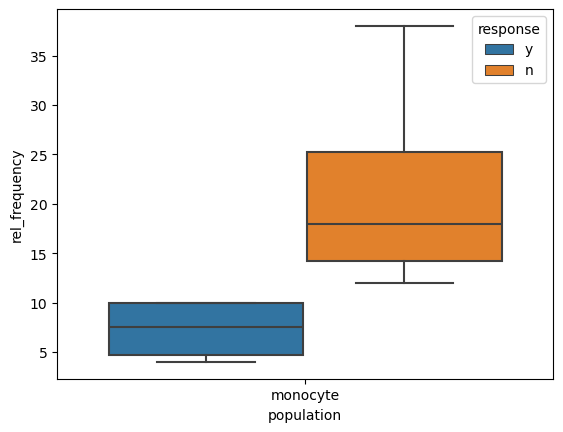

In [73]:
sns.boxplot(x='population', y='rel_frequency', hue='response', data=cell_count[cell_count['population']=='monocyte'])

In [58]:
compute_p_values('monocyte')

TtestResult(statistic=-2.3647584688883136, pvalue=0.08756928062435297, df=3.452944445770439)


# Results


## At a significance level of 0.05:

The relative frequencies of CD4 T-cells and Natural Killer cells show significant 
differences between responders and non-responders. With both cell types being present 
at higher proportions in responders.

## At a significance level of 0.1:

Monocytes also warrant further consideration. Responders seem to have low-levels 
of monocytes.




